In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [4]:
#read necessary CSV's
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
quali = pd.read_csv('qualifying.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')
circuit = pd.read_csv('circuits.csv')

In [47]:
circuit.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [53]:
df1 = pd.merge(races,results,how='inner',on=['raceId'])
df2 = pd.merge(df1,quali,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructors,how='inner',on=['constructorId'])
df5 = pd.merge(df4,circuit,how='inner',on=['circuitId'], suffixes=('_constructor', '_circuit'))

In [54]:
df5.head()

,raceId,year,round,circuitId,name_x,date,time_x,url_x,fp1_date,fp1_time,...,nationality_y,url_constructor,circuitRef,name,location,country,lat,lng,alt,url_circuit
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,...,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,\N,\N,...,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...,\N,\N,...,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [55]:
print(df5)

       raceId  year  round  circuitId                 name_x        date  \
0           1  2009      1          1  Australian Grand Prix  2009-03-29   
1           1  2009      1          1  Australian Grand Prix  2009-03-29   
2          18  2008      1          1  Australian Grand Prix  2008-03-16   
3          36  2007      1          1  Australian Grand Prix  2007-03-18   
4          55  2006      3          1  Australian Grand Prix  2006-04-02   
...       ...   ...    ...        ...                    ...         ...   
10099    1119  2023     21         80   Las Vegas Grand Prix  2023-11-19   
10100    1119  2023     21         80   Las Vegas Grand Prix  2023-11-19   
10101    1119  2023     21         80   Las Vegas Grand Prix  2023-11-19   
10102    1119  2023     21         80   Las Vegas Grand Prix  2023-11-19   
10103    1119  2023     21         80   Las Vegas Grand Prix  2023-11-19   

         time_x                                              url_x  \
0      06:00:00  

In [96]:
#consider yeears 2000 or after due to major regulation changes
data = df5[df5['year']>=2000]
data

,raceId,year,round,circuitId,name_x,date,time_x,url_x,fp1_date,fp1_time,...,nationality_y,url_constructor,circuitRef,name,location,country,lat,lng,alt,url_circuit
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,...,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,\N,\N,...,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...,\N,\N,...,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-16,04:30:00,...,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,vegas,Las Vegas Strip Street Circuit,Las Vegas,United States,36.1147,-115.173,642,https://en.wikipedia.org/wiki/Las_Vegas_Grand_...
10100,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-16,04:30:00,...,American,http://en.wikipedia.org/wiki/Haas_F1_Team,vegas,Las Vegas Strip Street Circuit,Las Vegas,United States,36.1147,-115.173,642,https://en.wikipedia.org/wiki/Las_Vegas_Grand_...
10101,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-16,04:30:00,...,American,http://en.wikipedia.org/wiki/Haas_F1_Team,vegas,Las Vegas Strip Street Circuit,Las Vegas,United States,36.1147,-115.173,642,https://en.wikipedia.org/wiki/Las_Vegas_Grand_...
10102,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-16,04:30:00,...,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,vegas,Las Vegas Strip Street Circuit,Las Vegas,United States,36.1147,-115.173,642,https://en.wikipedia.org/wiki/Las_Vegas_Grand_...


In [97]:
#drop the columns which are not important
data = data.drop(['round','circuitId','time_x','url_x','url_constructor', 'resultId','driverId'], axis= 1)
data = data.drop(['constructorId','number_x','positionText','position_x', 'url_circuit'], axis = 1)
data = data.drop(['positionOrder','laps','time_y','rank'], axis = 1)
data = data.drop(['fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef'], axis = 1)
data = data.drop(['location','lat','lng','alt','number_y','points','constructorRef','name_x','raceId','fastestLap','q2','q3','milliseconds','q1'], axis=1)

In [98]:
data.columns

Index(['year', 'date', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'grid', 'statusId', 'position_y', 'forename', 'surname',
       'dob', 'nationality_x', 'name_y', 'nationality_y', 'name', 'country'],
      dtype='object')

In [99]:
newest_data = data[data['year'] == 2023]
newest_data

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,statusId,position_y,forename,surname,dob,nationality_x,name_y,nationality_y,name,country
98,2023,2023-04-02,2023-03-31,01:30:00,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,...,3,8,Alexander,Albon,1996-03-23,Thai,Williams,British,Albert Park Grand Prix Circuit,Australia
102,2023,2023-04-02,2023-03-31,01:30:00,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,...,4,18,Logan,Sargeant,2000-12-31,American,Williams,British,Albert Park Grand Prix Circuit,Australia
149,2023,2023-04-02,2023-03-31,01:30:00,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,...,1,13,Lando,Norris,1999-11-13,British,McLaren,British,Albert Park Grand Prix Circuit,Australia
151,2023,2023-04-02,2023-03-31,01:30:00,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,...,1,16,Oscar,Piastri,2001-04-06,Australian,McLaren,British,Albert Park Grand Prix Circuit,Australia
197,2023,2023-04-02,2023-03-31,01:30:00,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,...,1,5,Carlos,Sainz,1994-09-01,Spanish,Ferrari,Italian,Albert Park Grand Prix Circuit,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,2023,2023-11-19,2023-11-16,04:30:00,2023-11-16,08:00:00,2023-11-17,04:30:00,2023-11-17,08:00:00,...,1,18,Guanyu,Zhou,1999-05-30,Chinese,Alfa Romeo,Swiss,Las Vegas Strip Street Circuit,United States
10100,2023,2023-11-19,2023-11-16,04:30:00,2023-11-16,08:00:00,2023-11-17,04:30:00,2023-11-17,08:00:00,...,5,13,Nico,Hülkenberg,1987-08-19,German,Haas F1 Team,American,Las Vegas Strip Street Circuit,United States
10101,2023,2023-11-19,2023-11-16,04:30:00,2023-11-16,08:00:00,2023-11-17,04:30:00,2023-11-17,08:00:00,...,1,9,Kevin,Magnussen,1992-10-05,Danish,Haas F1 Team,American,Las Vegas Strip Street Circuit,United States
10102,2023,2023-11-19,2023-11-16,04:30:00,2023-11-16,08:00:00,2023-11-17,04:30:00,2023-11-17,08:00:00,...,1,15,Daniel,Ricciardo,1989-07-01,Australian,AlphaTauri,Italian,Las Vegas Strip Street Circuit,United States


In [100]:
#rename some of the columns
data.rename(columns={'name':'GP_name','position_y':'position','grid':'quali_pos','name_y':'constructor','nationality_x':'driver_nationality','nationality_y':'constructor_nationality'},inplace=True)
data['driver'] = data['forename']+' '+data['surname']
data['date'] = pd.to_datetime(data['date'])
data['dob'] = pd.to_datetime(data['dob'])

In [101]:
#Some of the constructors changed their name over the year so replacing old names with current name
data['constructor'] = data['constructor'].apply(lambda x: 'Aston Martin' if x=='Force India' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Aston Martin' if x=='Racing Point' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Kick Sauber' if x=='Alfa Romeo' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Kick Sauber' if x=='Sauber' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Alpine' if x=='Lotus F1' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Alpine' if x=='Lotus' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Alpine' if x=='Renault' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Alpine' if x=='Alpine F1 Team' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Visa Cashapp Redbull' if x=='Toro Rosso' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Visa Cashapp Redbull' if x=='AlphaTauri' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Visa Cashapp Redbull' if x=='RB F1 Team' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Mercedes' if x=='Brawn' else x)

In [102]:
#reasons for DNF(did not finish)
data['driver_dnf'] = data['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
data['constructor_dnf'] = data['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)

In [103]:
data['driver_dnf']

0        0
1        0
2        1
3        0
4        0
        ..
10099    0
10100    0
10101    0
10102    0
10103    0
Name: driver_dnf, Length: 8708, dtype: int64

In [104]:
import matplotlib.pyplot as plt

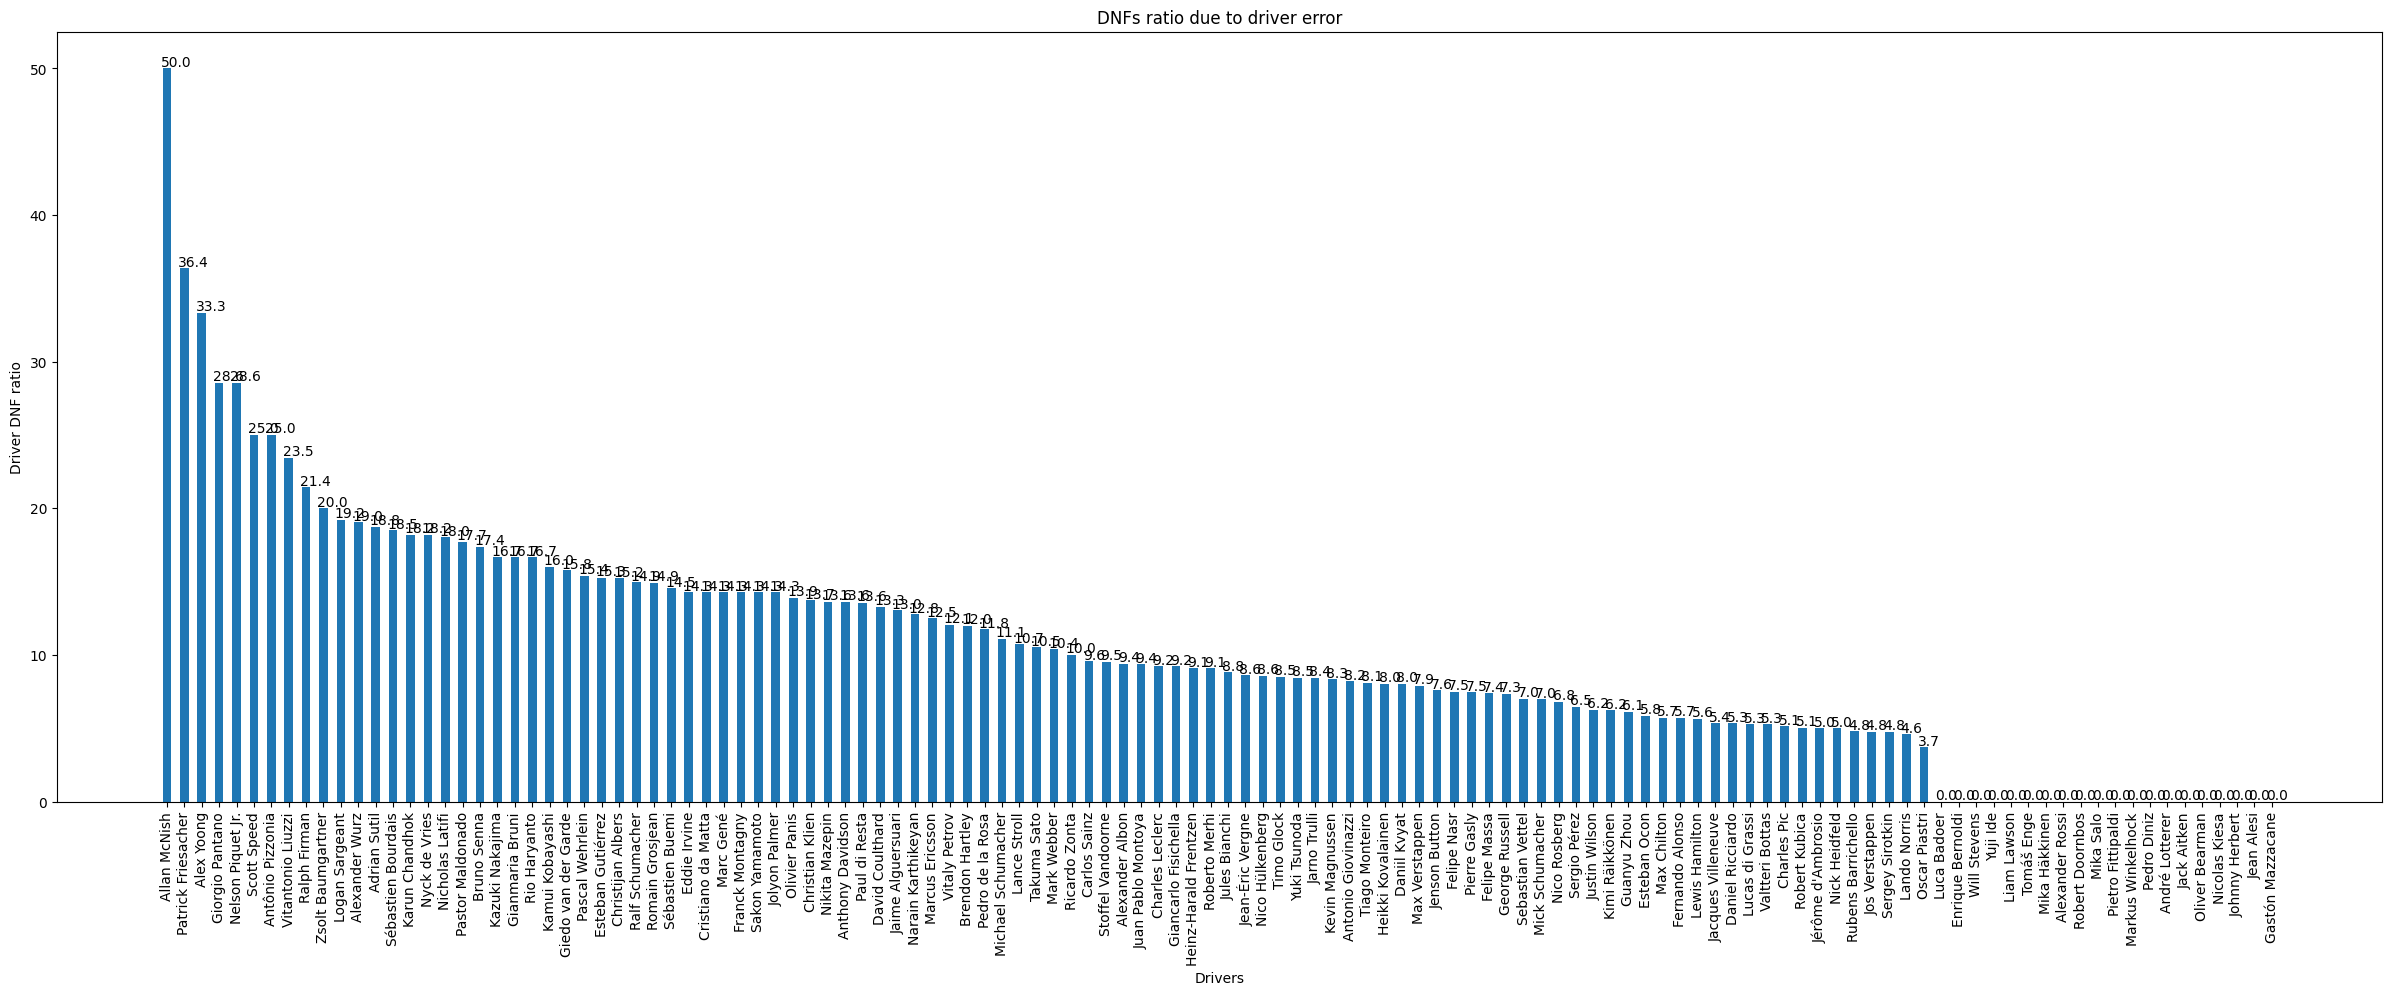

In [105]:
#display driver DNF data
dnf_by_driver = data.groupby('driver')['driver_dnf'].sum()
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver*100/driver_race_entered).sort_values(ascending=False)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_dnf_ratio.index,height=driver_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('Driver DNF ratio')
plt.title('DNFs ratio due to driver error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}')
plt.show()

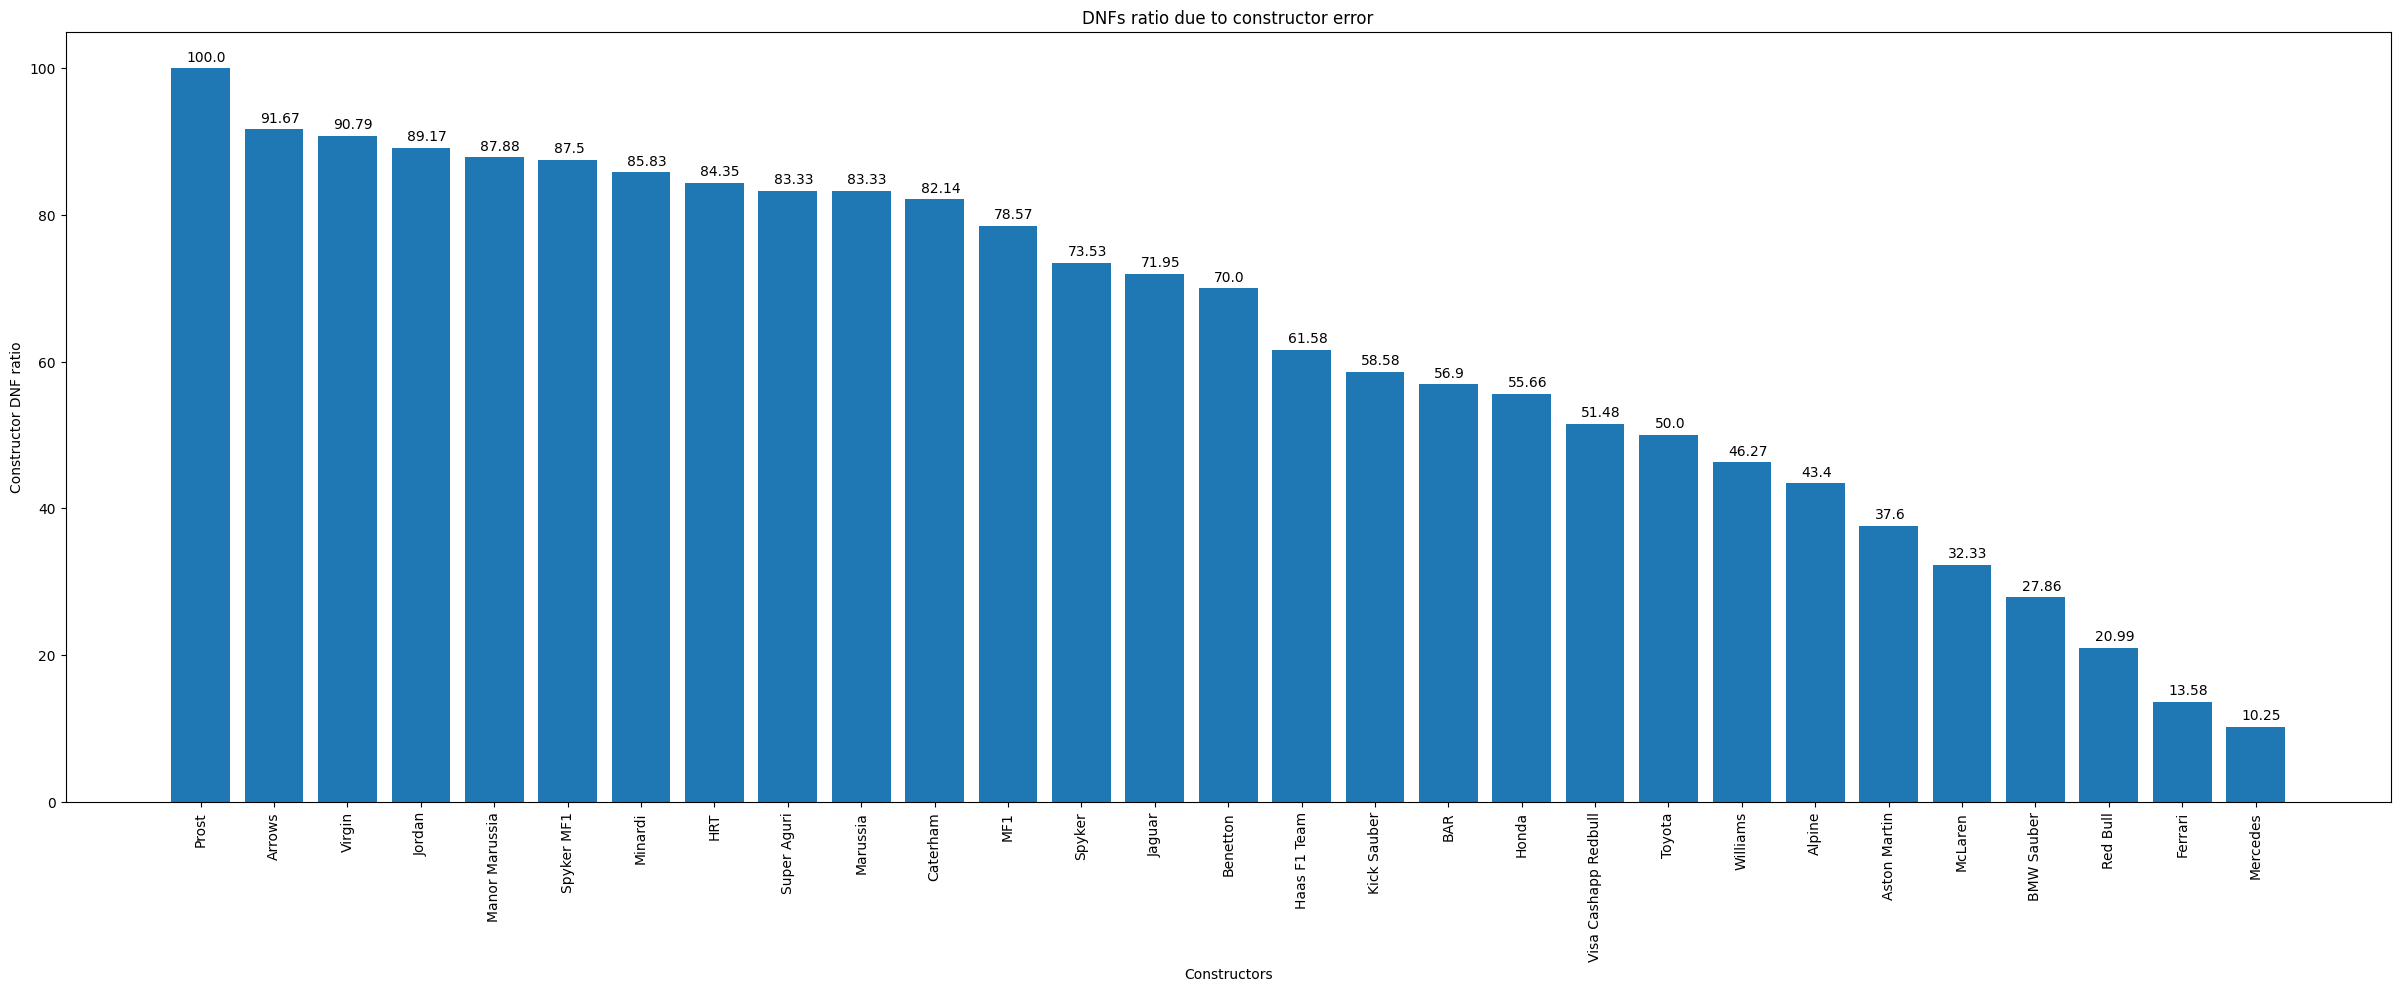

In [106]:
#display constructor DNF data
dnf_by_constructor = data.groupby('constructor')['constructor_dnf'].sum()
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor*100/constructor_race_entered).sort_values(ascending=False)
plt.figure(figsize=(30,10))
bars = plt.bar(x=constructor_dnf_ratio.index,height=constructor_dnf_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Constructors')
plt.ylabel('Constructor DNF ratio')
plt.title('DNFs ratio due to constructor error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.21,yval+1,f'{round(yval,2)}')
plt.show()

In [107]:
#normalize notation for driver natiionialities
data['driver_nationality'] = data['driver_nationality'].apply(lambda x: str(x)[:3])
data['constructor_nationality'] = data['constructor_nationality'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: 'Bri' if x=='UK' else x)
data['country'] = data['country'].apply(lambda x: 'Ame' if x=='USA' else x)
data['country'] = data['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
data['country'] = data['country'].apply(lambda x: str(x)[:3])
data['driver_home'] = data['driver_nationality'] == data['country']
data['constructor_home'] = data['constructor_nationality'] == data['country']
data['driver_home'] = data['driver_home'].apply(lambda x: int(x))
data['constructor_home'] = data['constructor_home'].apply(lambda x: int(x))

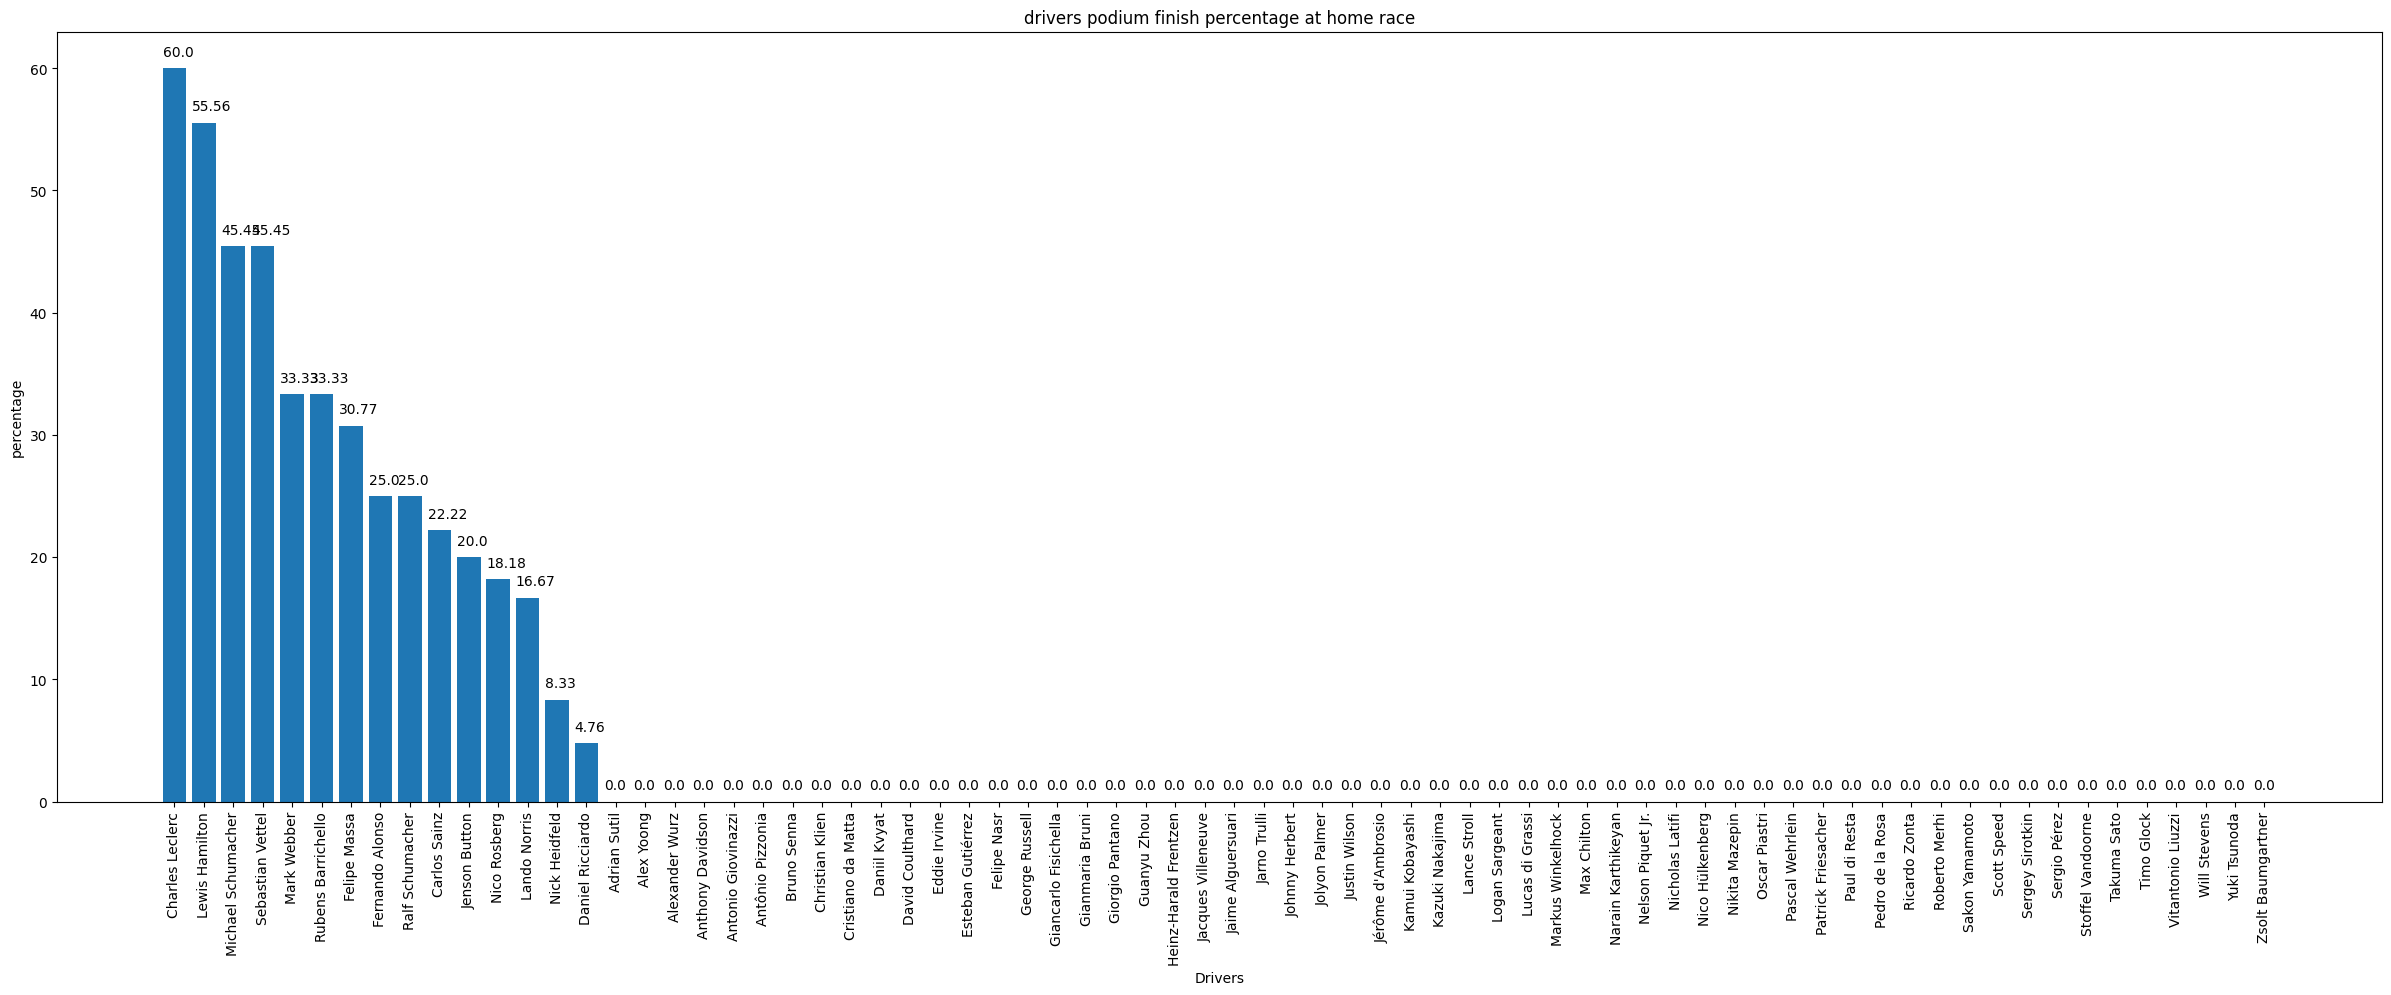

In [110]:
#driver home podium fiinish
driver_home_podium_finish = data.loc[(data['position']<4)&(data['driver_home']==1)].groupby('driver').count()['position']
total_home_races = data[data['driver_home']==1].groupby('driver')['driver_home'].sum()
driver_home_podium_finish_ratio = (driver_home_podium_finish*100/total_home_races).sort_values(ascending=False).fillna(0)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_home_podium_finish_ratio.index,height=driver_home_podium_finish_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('percentage')
plt.title('drivers podium finish percentage at home race')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(),yval+1,f'{round(yval,2)}')
plt.show()

In [112]:
#rate the drivers reliability based on a ration between there DNFs and number of races
dnf_by_driver = data.groupby('driver')['driver_dnf'].sum()
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_reliability = 1-driver_dnf_ratio
driver_reliability_dict = dict(zip(driver_reliability.index,driver_reliability))

In [113]:
#rate the constructors reliablilty
dnf_by_constructor = data.groupby('constructor')['constructor_dnf'].sum()
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_relaiblity = 1-constructor_dnf_ratio
constructor_relaiblity_dict = dict(zip(constructor_relaiblity.index,constructor_relaiblity))

In [129]:
#add columns for reliability and mark active constructors and drivers
data['driver_reliability'] = data['driver'].apply(lambda x:driver_reliability_dict[x])
data['constructor_relaiblity'] = data['constructor'].apply(lambda x:constructor_relaiblity_dict[x])
#removing retired drivers and constructors
active_constructors = ['Alpine', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'Visa Cashapp Redbull', 'Aston Martin', 'Kick Sauber', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Kevin Magnussen', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Yuki Tsunoda', 'Oscar Piastri',
                  'Charles Leclerc', 'Lewis Hamilton', 'Logan Sergeant',
                  'Max Verstappen', 'Pierre Gasly', 'Alexander Albon',
                  'Sergio Pérez', 'Esteban Ocon', 'Guanyu Zhou',
                  'Nico Hülkenberg','Fernando Alonso']
data['active_driver'] = data['driver'].apply(lambda x: int(x in active_drivers))
data['active_constructor'] = data['constructor'].apply(lambda x: int(x in active_constructors))

In [132]:
#after parsing, save changes to new CSV to be used for models
cleaned_data = data[['GP_name','quali_pos','constructor','driver','position','driver_reliability','constructor_relaiblity','active_driver','active_constructor','dob']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]
cleaned_data.to_csv('cleaned_data.csv',index=False)